<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/24-1ESAA/Part4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn 라이브러리 - 고급 그래프 도구

seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전이다. 비교적 단순한 인터페이스를 제공하기 때문에 초보자도 어렵지 않게 배울 수 있다.

먼저 Seaborn 라이브러리를 설치해야 한다. 아나콘다 배포판을 사용하는 경우 기본으로 설치되기 때문에 설치를 하지 않아도 된다. 한편 파이썬 실행 파일에 Seaborn 라이브러리를 임포트할 때는 'sns'라는 약칭을 주로 사용한다.

* 데이터셋 가져오기

Seaborn 라이브러리에서 제공하는 'titanic' 데이터셋을 사용한다. Seaborn의 load_dataset() 함수를 사용하여 데이터프레임으로 가져온다. 모두 891명의 탑승객 정보가 담겨 있다.

In [ ]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

* 회귀선이 있는 산점도

regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타낸다. fit_reg=False 옵션을 설정하면 회귀선을 안 보이게 할 수 있다.

다음의 예제에서 왼쪽 그래프는 선형회귀선을 표시하고 오른쪽 그래프에는 표시하지 않는다.

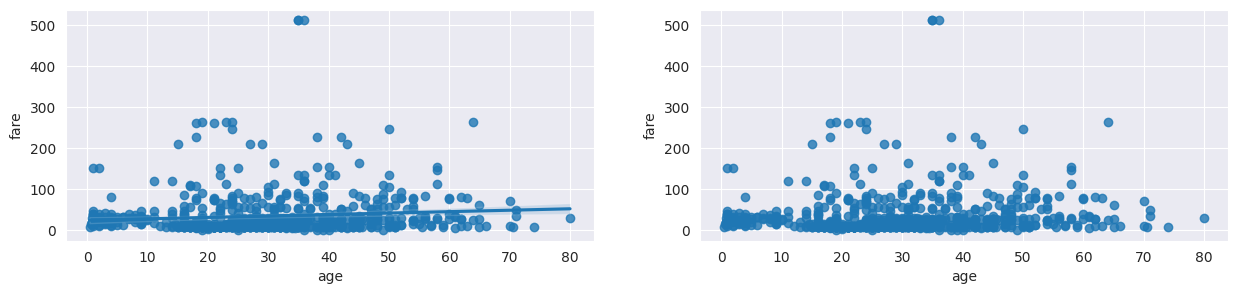

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 3))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',      # x축 변수
            y='fare',     # y축 변수
            data=titanic, # 데이터
            ax=ax1)       # axe 객체 - 1번째 그래프

sns.regplot(x='age',       # x축 변수
            y='fare',      # y축 변수
            data=titanic,  # 데이터
            ax=ax2,        # axe 객체 - 2번째 그래프
            fit_reg=False) # 회귀선 미표시

plt.show()

* 히스토그램/커널 밀도 그래프

단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 이용한다. 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.

hist=False 옵션을 추가하면 히스토그램이 표시되지 않고, kde=False 옵션을 전달하면 커널 밀도 그래프를 표시하지 않는다. 한편 밀도 그래프는 displot 함수를 사용하고, 히스토그램은 histplot 함수를 사용할 수 있다.

<ipython-input-4-a8d89b91e7af>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


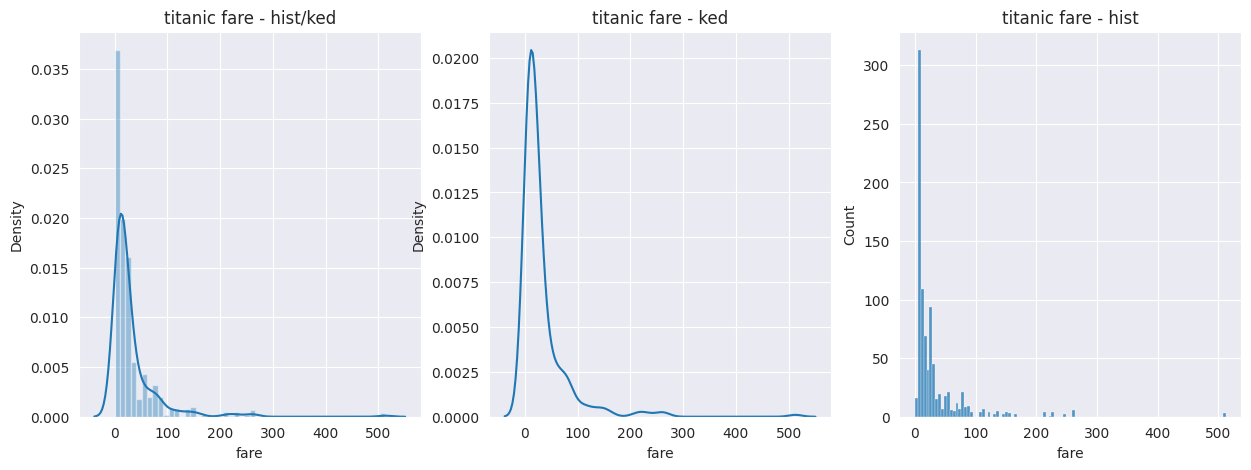

In [ ]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)

# distplot
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

타이타닉의 운임('fare' 열)의 분포를 그리면, 대부분 100달러 미만에 집중되어 있다.

* 히트맵

Seaborn 라이브러리는 히트맵(heatmap)을 그리는 heatmap() 메소드를 제공한다. 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류한다. 데이터프레임을 피벗테이블로 정리할 때 한 변수('sex' 열)를 행 인덱스로 나머지 변수('class' 열)를 열 이름으로 설정한다. aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다. 피벗테이블에 대해서는 [Part 6]에서 자세히 알아본다.

히트맵을 그려 보면 타이타닉호에는 여자(female) 승객보다 남자(male) 승객이 상대적으로 많은 편이다. 특히 3등석 남자 승객의 수가 압도적으로 많은 것을 알 수 있다. 여기서는 cbar=False 옵션을 사용하여 컬러 바가 표시되지 않았는데, cbar=True 옵션으로 표시할 수도 있다.

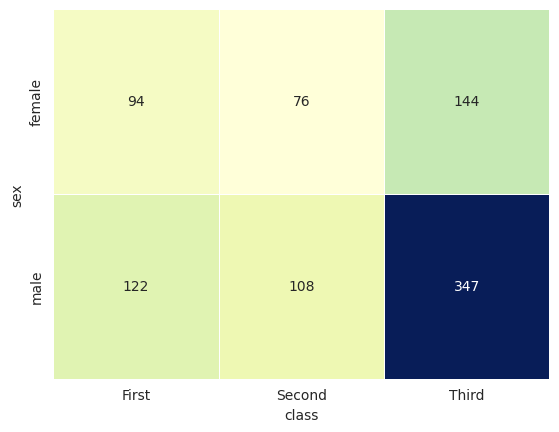

In [ ]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table=titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,               # 데이터프레임
            annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',       # 컬러 맵
            linewidth=.5,        # 구분 선
            cbar=False)          # 컬러 바 표시 여부

plt.show()

* 범주형 데이터의 산점도

범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법이다. stripplot() 함수와 swrmplot() 함수를 사용할 수 있다. swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다. 즉, 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있다.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


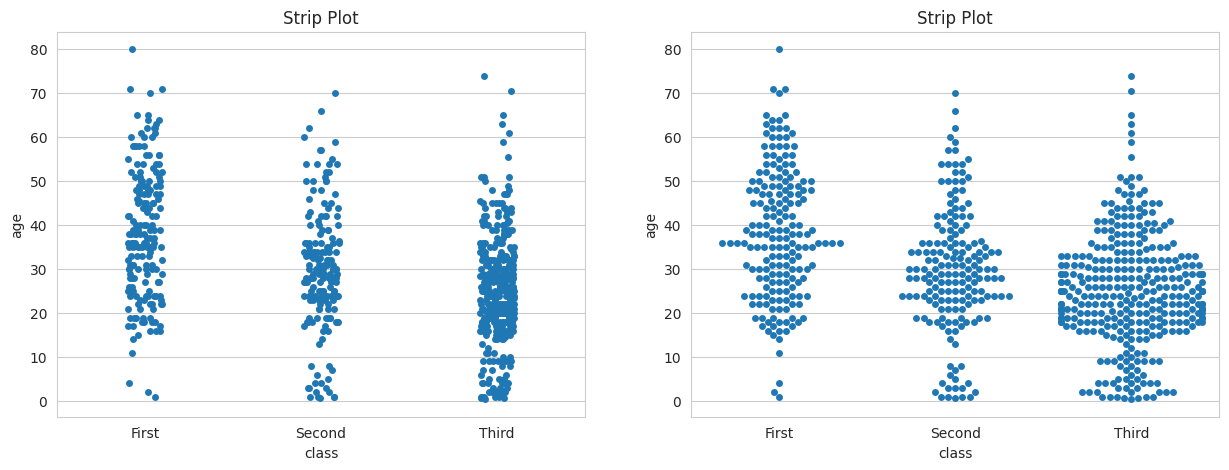

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 o)
sns.stripplot(x='class',    # x축 변수
              y='age',      # y축 변수
              data=titanic, # 데이터셋 - 데이터프레임
              ax=ax1)       # axe 객체 - 1번째 그래프

# 이산형 변수와 분포 - 데이터 분산 고려(중복 표시 x)
sns.swarmplot(x='class',    # x축 변수
              y='age',      # y축 변수
              data=titanic, # 데이터셋 - 데이터프레임
              ax=ax2)       # axe 객체 - 2번째 그래프

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

앞의 예제에서 `hue='sex`' 옵션을 `stripplot()` 함수 또는 `swarmplot()` 함수에 추가하면, 'sex' 열의 데이터 값인 **남녀 성별을 색상으로 구분하여 출력**한다.

* 막대 그래프

막대 그래프를 그리는 barplot() 함수를 소개한다. 3개의 axe 객체(서브 플롯)을 만들고, 옵션에 변화를 주면서 차이를 살펴보자. x축, y축에 변수 할당, x축, y축에 변수 할당하고 hue 옵션 추가, x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력 순으로 실행한다.

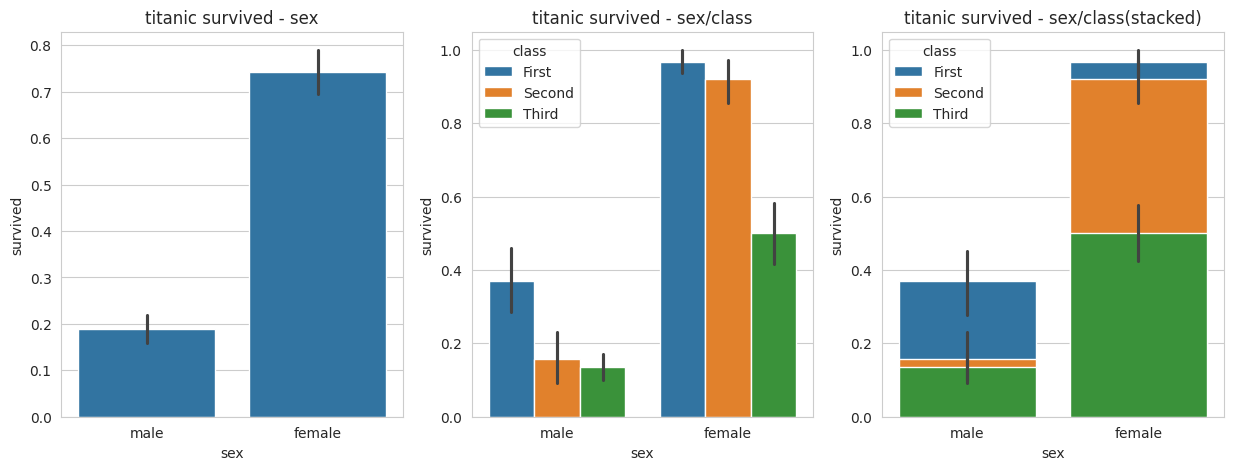

In [ ]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1, 3, 1)
ax2=fig.add_subplot(1, 3, 2)
ax3=fig.add_subplot(1, 3, 3)

# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

* 빈도 그래프

각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 countplot() 함수를 소개한다.

예제를 통해 3개의 서브 플롯을 비교한다. "기본 설정, hue 옵션 추가, 축 방향으로 hue 변수를 분리하지 않고 위로 쌓아 올리는 누적 그래프로 출력" 순으로 실행한다. 그래프 색 구성을 다르게 하려면 palette 옵션을 변경하여 적용한다.

<ipython-input-9-5f3fa3821a09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)


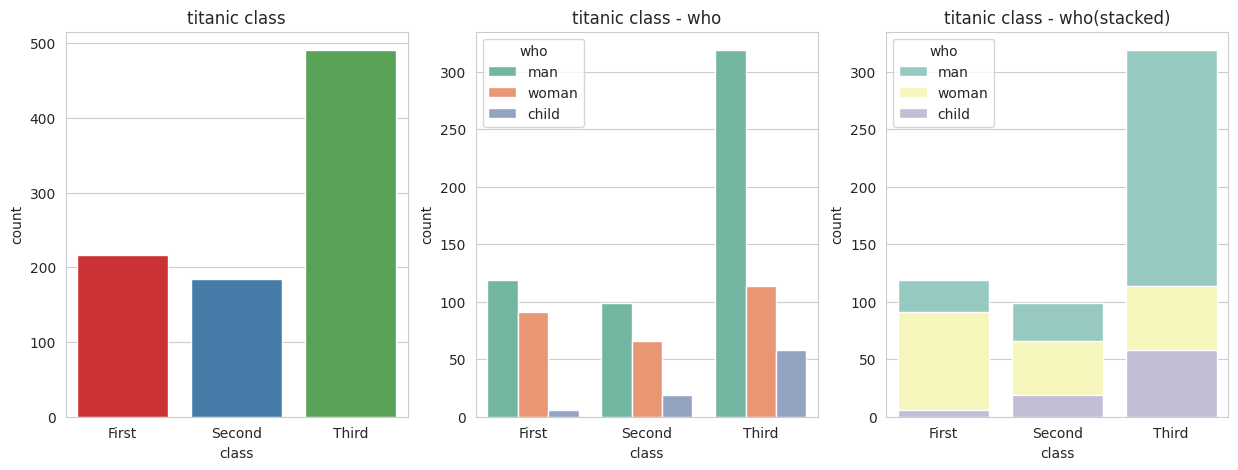

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

* 박스 플롯/바이올린 그래프

박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공한다. 다만, 박스 플롯만으로는 데이터가 퍼져 있는 분산의 정도를 정확하게 알기는 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있다. 박스 플롯은 boxplot() 함수로 그리고 바이올린 그래프는 violinplot() 함수로 그린다.

예제에서는 타이타닉 생존자의 분포를 파악한다. hue 변수에 'sex' 열을 추가하면 남녀 데이터를 구분하여 표시할 수 있다.

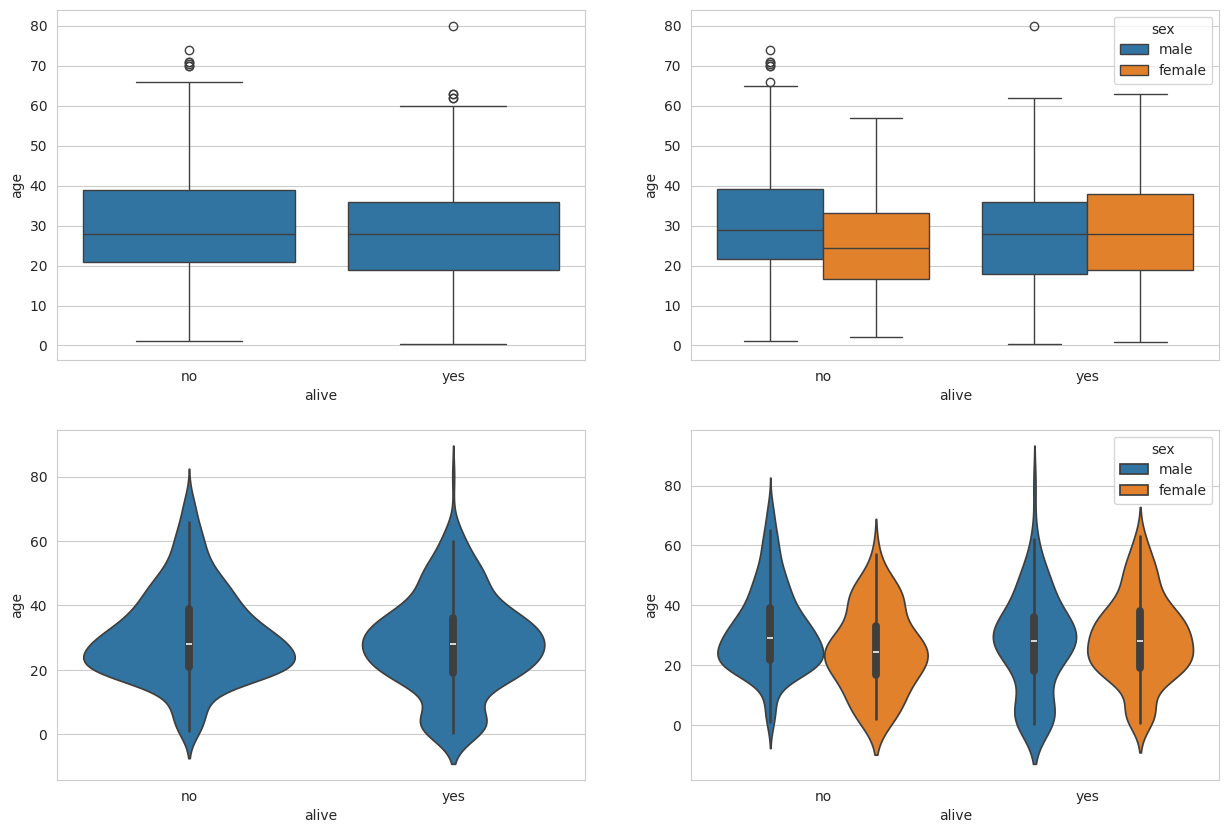

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig=plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(2, 2, 1)
ax2=fig.add_subplot(2, 2, 2)
ax3=fig.add_subplot(2, 2, 3)
ax4=fig.add_subplot(2, 2, 4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 박스 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

* 조인트 그래프

jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다. 따라서 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋다. 예제에서는 산점도(기본값), 회귀선 추가(kind='reg'), 육각 산점도(kind='hex'), 커널 밀집 그래프(kind='kde') 순으로 조인트 그래프를 그리고 차이를 비교한다.

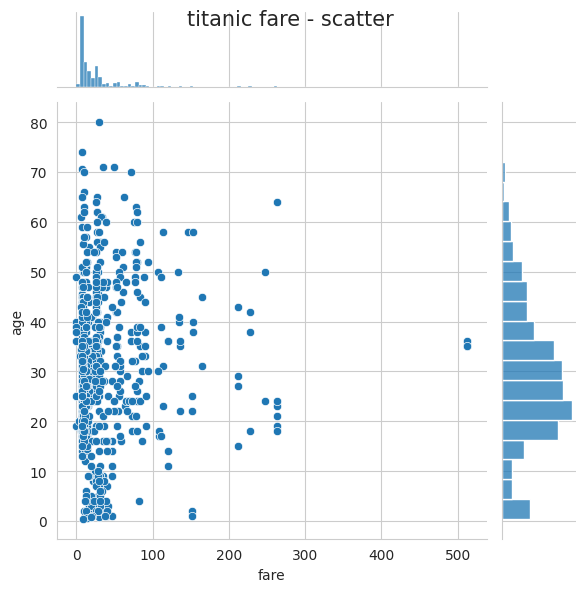

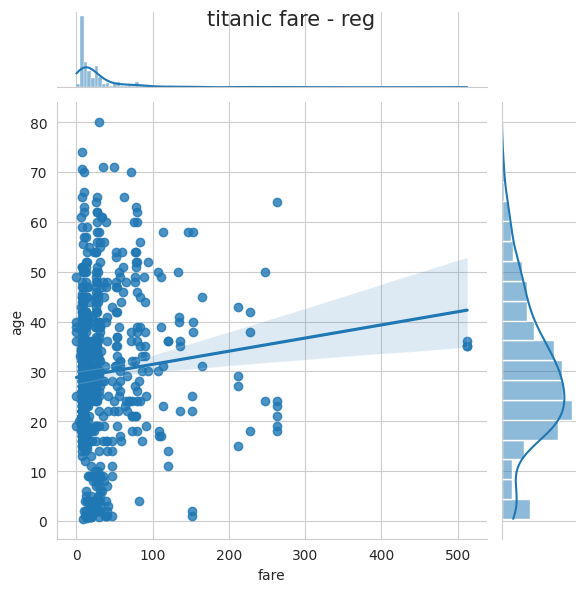

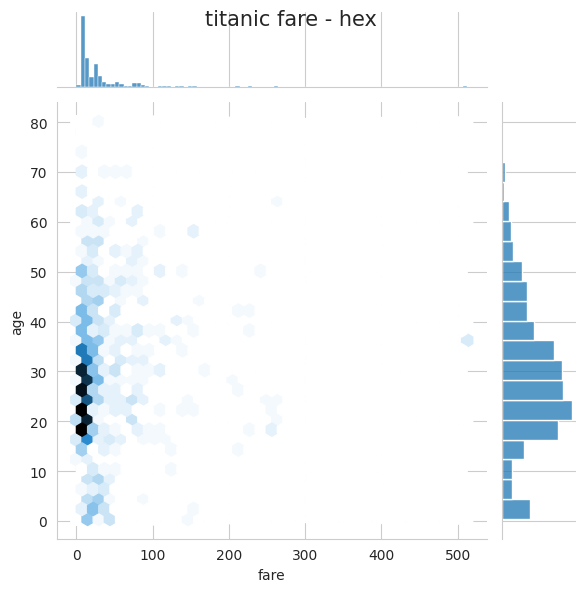

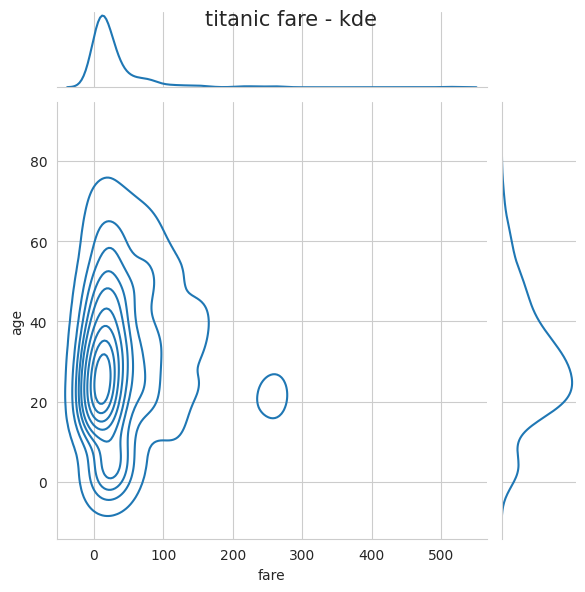

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1=sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2=sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3=sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4=sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

* 조건을 적용하여 화면을 그리드로 분할하기

FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만든다. 그리고 각 서브 플롯에 적용할 그래프 종류를 map() 메소드를 이용하여 그리드 객체에 전달한다.

다음의 예제는 열 방향으로는 'who' 열의 탑승객 구분(man, woman, child) 값으로 구분하고, 행 방향으로는 'survived' 열의 구조 여부(구조 survived=1, 구조실패 survived=0) 값으로 구분하여 2행x3열 모양의 그리드를 만든다. 각 조건에 맞는 탑승객을 구분하여, 'age' 열의 나이를 기준으로 히스토그램을 그려본다. 남성에 비해 여성 생존자가 상대적으로 많은 편이고, 성인 중에서는 활동성이 좋은 20~40대의 생존자가 많은 것으로 나타난다.

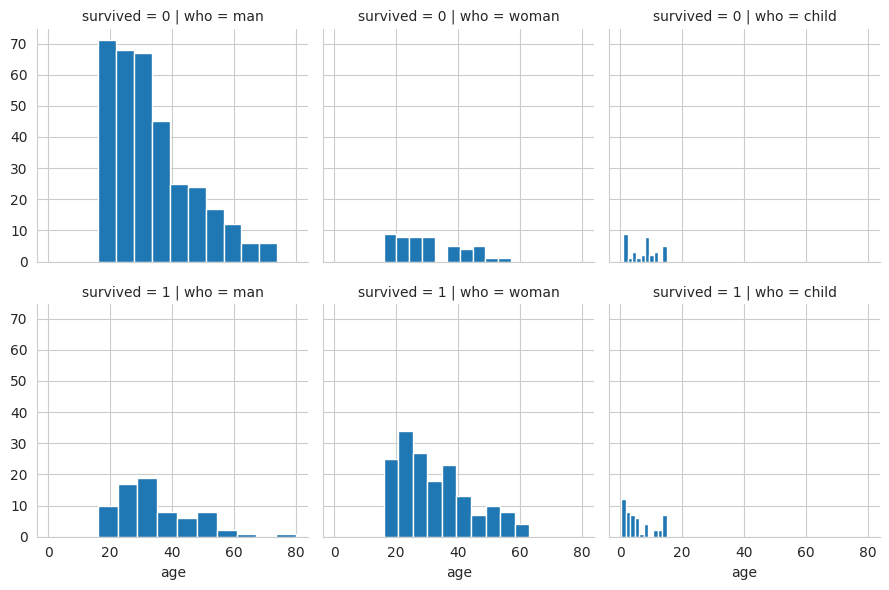

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic=sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g=sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g=g.map(plt.hist, 'age')

* 이변수 데이터의 분포

pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다. 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다.

다음의 예제에서는 3개의 열을 사용하기 때문에 3행x3열 크기로 모두 9개의 그리드를 만든다. 각 그리드에 두 변수 간의 관계를 나타내는 그래프를 하나씩 그린다. 같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그리고 서로 다른 변수 간에는 산점도를 그린다.

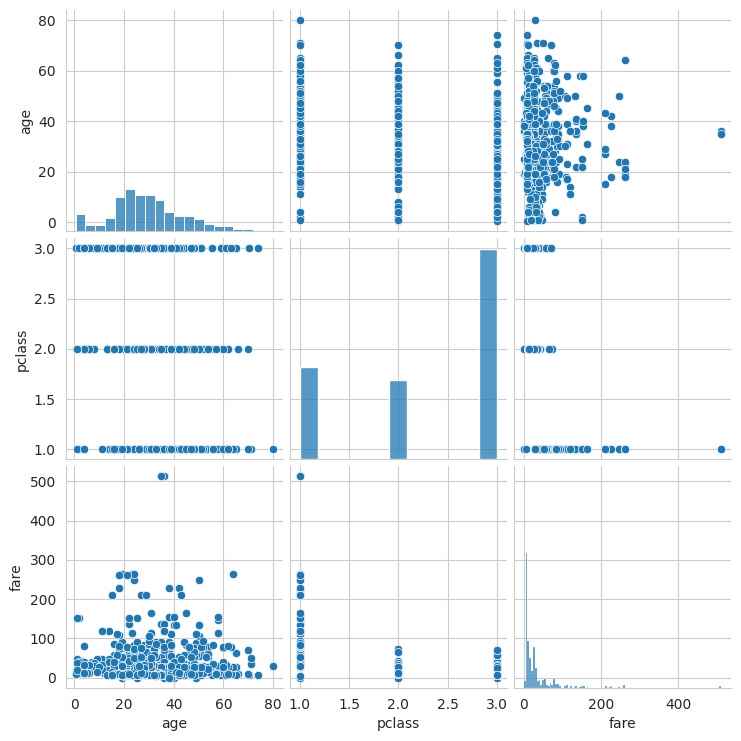

In [ ]:
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair=titanic[['age', 'pclass', 'fare']]

# 조건에 따라 그리드 나누기
g=sns.pairplot(titanic_pair)

# 3. Folium 라이브러리 - 지도 활용

Folium 라이브러리는 지도 위에 시각화할 때 유용한 도구이다. 세계 지도를 기본 지원하고 다양한 스타일의 지도 이미지를 제공하고 있다.

* Folium 설치하기

Folium을 사용하기 위해서는 먼저 라이브러리를 설치해야 한다. 아나콘다 배포판을 사용하는 경우에도 설치가 필요하다. 설치 방법은 비교적 간단하다.

1. 아나콘다 프롬프트 실행
2. conda install -c conda-forge folium 입력, Enter
3. 설치가 완료되면 아나콘다 내비게이터를 재실행시킨다.

* 지도 만들기

Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있다. 지도 화면은 고정된 것이 아니고 줌(zoom) 기능과 화면 이동(scroll)이 모두 가능하다.

단, 예제 코드를 스파이더(Spyder)와 같은 IDE에서 실행해도 지도가 표시되지 않는다. 그 이유는 Folium은 웹 기반 지도를 만들기 때문인데, 오직 웹 환경에서만 지도를 확인할 수 있다. 따라서 스파이더를 사용하는 경우라면 지도 객체를 바로 확인할 수 없다. 지도를 보려면 지도 객체에 save() 메소드를 적용하여 HTML 파일로 저장하고, 웹브라우저에서 파일을 열어서 확인해야 한다. 한편 Jupyter Notebook 등 웹 기반 IDE에서는 지도 객체를 바로 확인할 수 있다.

이 책은 스파이더를 기준으로 HTML 파일을 저장해서 웹브라우저로 확인하는 방법으로 설병한다. 지도 객체를 생성하는 Map() 함수의 location 옵션에 [위도, 경도] 수치를 입력하면 그 지점을 중심으로 지도를 보여준다. zoom_start 옵션을 사용하면 화면 확대 비율을 조절할 수 있다.

In [ ]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map=folium.Map(location=[37.55, 126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')

* 지도 스타일 적용하기

Map() 함수에 tiles 옵션을 적용하면 지도에 적용하는 스타일을 변경하여 지정할 수 있다. 다음의 예제에서는 'Stamen Terrain' 맵과 'Stamen Toner' 맵의 스타일을 비교한다.

-> Stamen이 서비스를 중단했다고 함

* 지도에 마커 표시하기

서울 시내 주요 대학교의 위치 데이터를 데이터프레임으로 변환하고, Folium 지도에 위치를 표시해보자. 마커 위치를 표시하려면 Marker() 함수에 위도, 경도 정도를 전달한다. popup 옵션을 추가하면 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df=pd.read_excel('./서울지역 대학교 위치.xlsx', engine='openpyxl')

# 서울 지도 만들기
seoul_map=folium.Map(location=[37.55, 126.98],
                     zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

저장된 HTML 파일을 웹 브라우저에서 실행한다. 서울 주요 대학의 위치에 마커가 표시된다. 숙명여자대학교 위치의 마커를 클릭했을 때 팝업 메시지가 나타나는 모습을 볼 수 있다.

이번에는 원형 마커를 표시해 보자. 앞의 예제에서 Marker() 함수 대신에 CircleMarker() 함수를 사용한다. 원형 마커의 크기, 색상, 투명도 등을 설정할 수 있다.

In [ ]:
# 대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,          # 원의 반지름
                        color='brown',      # 원의 둘레 색상
                        fill=True,
                        fill_color='coral', # 원을 채우는 색
                        fill_opacity=0.7,   # 투명도
                        popup=name
                        ).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

* 지도 영역에 단계구분도(Choropleth Map) 표시하기

행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법이다. 전달하려는 정보의 값이 커지면 영역에 칠해진 색이나 음영이 진해진다.

예제에서는 경기도 지역의 시군구별 인구 변화 데이터(2007~2017년), 경기도 행정구역 경계 지리 정보를 사용한다. Choropleth() 함수를 이용한다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path='./경기도인구데이터.xlsx'
df=pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns=df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path='./경기도행정구역경계.json'
try:
    geo_data=json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data=json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map=folium.Map(location=[36.5502, 126.982],
                 zoom_start=9)

# 출력할 연도 선택(2007-2017년 중에서 선택)
year='2007'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,
                  data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name',
                  ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_'+year+'.html')

year='2007'라고 입력하여, 2007년도 경기도 지역의 인구 수를 지도에 표시하였다. 웹 브라우저에서 HTML 파일을 열어 보면 동북부 지역을 제외하고 비교적 균일한 분포를 나타낸다.

year='2017'라고 입력하여, 2017년도 경기도 지역의 인구 수를 지도에 표시하였다. 2007년과 비교하면 남양주, 분당, 화성(동탄) 지역의 신도시 개발과 인구 유입으로 인구가 집중되는 현상이 심화되는 것을 볼 수 있다.